In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load processed data
train_data = pd.read_csv('../data/processed/train_data.csv')
test_data = pd.read_csv('../data/processed/test_data.csv')

X_train = train_data.drop('Churn', axis=1)
y_train = train_data['Churn']
X_test = test_data.drop('Churn', axis=1)
y_test = test_data['Churn']

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (5634, 20)
Test set: (1409, 20)


In [3]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.806

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [4]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.783

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



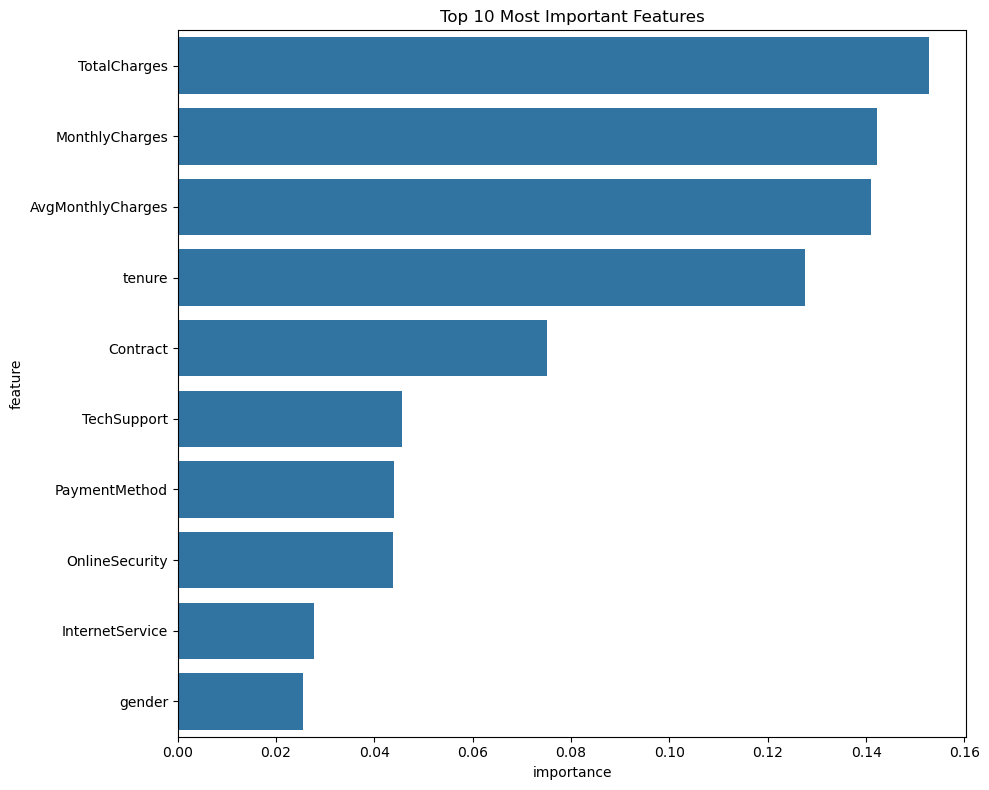

Top 10 Features:
              feature  importance
18       TotalCharges    0.152749
17     MonthlyCharges    0.142290
19  AvgMonthlyCharges    0.140954
4              tenure    0.127668
14           Contract    0.075046
11        TechSupport    0.045647
16      PaymentMethod    0.043942
8      OnlineSecurity    0.043849
7     InternetService    0.027789
0              gender    0.025381


In [5]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

print("Top 10 Features:")
print(feature_importance.head(10))

In [6]:
# Save trained models
joblib.dump(lr_model, '../models/logistic_regression.pkl')
joblib.dump(rf_model, '../models/random_forest.pkl')

print("Models saved successfully!")
print(f"Logistic Regression Accuracy: {lr_accuracy:.1%}")
print(f"Random Forest Accuracy: {rf_accuracy:.1%}")

Models saved successfully!
Logistic Regression Accuracy: 80.6%
Random Forest Accuracy: 78.3%
